In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [3]:
df.shape

(205, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 17.7+ KB


In [5]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [7]:
df["normalized-losses"].replace("?",np.nan,inplace=True)
df["normalized-losses"] = df["normalized-losses"].astype(float)
losses_mean = df["normalized-losses"].mean()
df["normalized-losses"].fillna(losses_mean,inplace=True)

In [8]:
df["horsepower"].replace("?",np.nan,inplace=True)
df["horsepower"] = df["horsepower"].astype(float)
horsepower_mean = df["horsepower"].mean()
df["horsepower"].fillna(horsepower_mean,inplace=True)

#### Seperating Categorical and Numerical Attributes

In [9]:
df_num = df.select_dtypes(["int64","float64"])
df_cat = df.select_dtypes("object")

In [10]:
df_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [11]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


#### Perform Label Encoding on Categorical Dataset

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [14]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


In [16]:
df_new = pd.concat([df_num,df_cat],axis=1)
df_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,122.0,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,122.0,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,122.0,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,164.0,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,164.0,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
# Spliting Dataset
X = df_new.drop("price",axis=1)
y = df["price"]

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                 random_state=1)

In [21]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
# Train score
lr.score(X_train,y_train)

0.8504573774895473

In [23]:
# Test score
lr.score(X_test,y_test)

0.796556678039738

In [25]:
lr.coef_

array([ 4.51384957e+01,  1.53127607e+00,  7.89452171e+02,  3.62663990e+02,
        9.83682875e+01, -1.08169245e+01,  3.08017854e+02, -4.17024371e+02,
       -2.00099087e+02, -6.22650015e+02, -1.70235175e+02,  1.86860719e+03,
        1.64133620e+04,  2.83174279e+02])

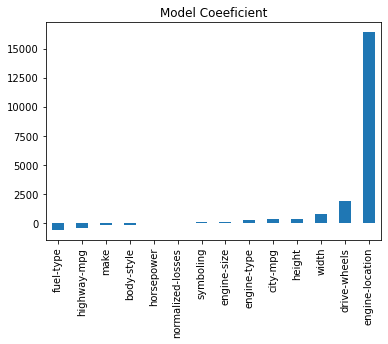

In [31]:
predictors = X_train.columns
coef = pd.Series(lr.coef_,predictors).sort_values()
coef.plot(kind='bar',title="Model Coeeficient")

In [26]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [27]:
# Ridge
l2 = Ridge(10) # alpha(error) = 10
l2.fit(X_train,y_train)
l2.coef_

array([ 2.08658930e+02, -5.60173023e-01,  3.64420144e+02,  5.72916414e+02,
        1.04441215e+02,  2.21332730e+01,  2.11271281e+02, -2.72864381e+02,
       -1.86340249e+02, -9.06610516e+02, -6.30655861e+02,  1.56860422e+03,
        2.57047785e+03,  5.15948757e+02])

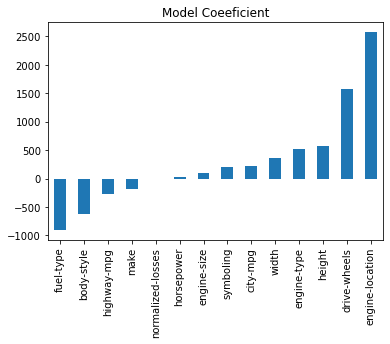

In [28]:
predictors = X_train.columns
coef = pd.Series(l2.coef_,predictors).sort_values()
coef.plot(kind='bar',title="Model Coeeficient")

In [29]:
# Lasso Regression
l1 = Lasso(1000)
l1.fit(X_train,y_train)
l1.coef_

array([   0.        ,    3.96310671,    0.        ,  276.93279232,
        135.34169218,   16.00129073,   -0.        , -113.03311963,
       -126.40695244,   -0.        ,   -0.        ,    0.        ,
          0.        ,    0.        ])

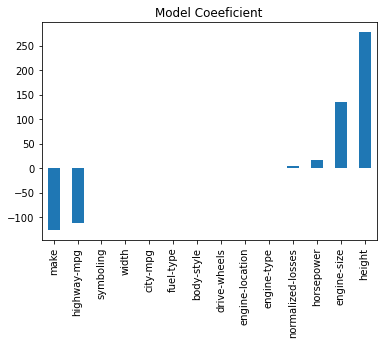

In [33]:
predictors = X_train.columns
coef = pd.Series(l1.coef_,predictors).sort_values()
coef.plot(kind='bar',title="Model Coeeficient")

In [34]:
for i in range(50):
    l2 = Ridge(alpha=i)
    l2.fit(X_train,y_train)
    print(i,":",l2.score(X_test,y_test))

0 : 0.7965566780397377
1 : 0.8074518758147272
2 : 0.8110292248150516
3 : 0.8126933383890032
4 : 0.8136148645029299
5 : 0.8141745853539417
6 : 0.8145301242133356
7 : 0.8147582608502815
8 : 0.8149010602831951
9 : 0.8149836949253051
10 : 0.8150222867376529
11 : 0.8150277245431791
12 : 0.8150076788279417
13 : 0.814967738178826
14 : 0.8149120868051176
15 : 0.8148439278252517
16 : 0.8147657584947389
17 : 0.8146795554128125
18 : 0.8145869029046832
19 : 0.8144890843369588
20 : 0.8143871485445551
21 : 0.8142819591129824
22 : 0.8141742315788493
23 : 0.8140645619421537
24 : 0.813953448816606
25 : 0.8138413108452036
26 : 0.8137285005403768
27 : 0.8136153153884844
28 : 0.8135020068362636
29 : 0.8133887876197211
30 : 0.8132758377831448
31 : 0.8131633096537951
32 : 0.8130513319772292
33 : 0.8129400133729977
34 : 0.8128294452363017
35 : 0.8127197041851854
36 : 0.8126108541327799
37 : 0.8125029480485759
38 : 0.8123960294605084
39 : 0.8122901337400302
40 : 0.8121852892047277
41 : 0.8120815180669059
42 :

In [35]:
for i in range(200,500,50):
    l1 = Lasso(alpha=i)
    l1.fit(X_train,y_train)
    print(i,":",l1.score(X_test,y_test))

200 : 0.8139201358023781
250 : 0.8124219090780231
300 : 0.8085057299003379
350 : 0.803605375312906
400 : 0.7977229768452248
450 : 0.7950465607641612


In [36]:
# Final models
l2 = Ridge(alpha=2)
l2.fit(X_train,y_train)
print(l2.score(X_test,y_test))

0.8110292248150516


In [37]:
l2.coef_

array([ 1.66477241e+02, -8.84331252e-01,  5.06201386e+02,  5.02070806e+02,
        1.00154543e+02,  1.04124700e+01,  2.44076984e+02, -3.27713737e+02,
       -1.94641841e+02, -1.13894088e+03, -4.80922921e+02,  1.88121378e+03,
        7.76076971e+03,  4.65928529e+02])

In [38]:
l1 = Lasso(alpha=200)
l1.fit(X_train,y_train)
print(l1.score(X_test,y_test))

0.8139201358023781


In [40]:
l1.coef_

array([ 0.00000000e+00,  2.07002782e+00,  3.23427588e+02,  4.69420186e+02,
        1.15553544e+02,  1.42784033e+01,  3.62975615e+01, -1.24776284e+02,
       -1.67461354e+02, -0.00000000e+00, -4.05115132e+02,  1.11242794e+03,
        2.09462838e+03,  3.05815537e+02])

### cross validation

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
l1_cross = cross_val_score(l1,X,y,cv=4)
l1_cross

array([0.76560829, 0.81872367, 0.43344753, 0.448364  ])

In [43]:
l2_cross = cross_val_score(l2,X,y,cv=4)
l2_cross

array([0.71176474, 0.86474228, 0.37640664, 0.47020196])

In [44]:
np.mean(l1_cross)

0.6165358705430697

In [45]:
np.mean(l2_cross)

0.6057789059244747

### Theory

### Types of Regularization.

#### Ridge Regression

#### Lasso Regression

### Cross Validation

### Important Points